In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib 
import matplotlib.pyplot as plt
 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay

import datetime 
print(f"Notebook last updated:{datetime.datetime.now()}\n")
      
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")


Notebook last updated:2025-07-16 11:07:50.606273

NumPy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.1


KNN

In [2]:
df = pd.read_csv("Heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.drop("target", axis=1)
y = df["target"]

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [5]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((61, 13), (242, 13), (61,), (242,))

In [6]:
Train_Scores = []
Test_Scores = []

neighbores = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbores:
    knn.set_params(n_neighbors = i)
    
    knn.fit(x_train, y_train)
    
    Train_Scores.append(knn.score(x_train, y_train))
    Test_Scores.append(knn.score(x_test, y_test))

Train Scores

In [7]:
Train_Scores

[1.0,
 0.8688524590163934,
 0.8360655737704918,
 0.7868852459016393,
 0.819672131147541,
 0.8032786885245902,
 0.7704918032786885,
 0.7049180327868853,
 0.7540983606557377,
 0.7540983606557377,
 0.7213114754098361,
 0.7540983606557377,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869]

Test Scores

In [8]:
Test_Scores

[0.5867768595041323,
 0.5289256198347108,
 0.640495867768595,
 0.5991735537190083,
 0.6446280991735537,
 0.6198347107438017,
 0.6198347107438017,
 0.6239669421487604,
 0.628099173553719,
 0.6322314049586777,
 0.6363636363636364,
 0.6363636363636364,
 0.640495867768595,
 0.6198347107438017,
 0.6652892561983471,
 0.6239669421487604,
 0.6611570247933884,
 0.628099173553719,
 0.6446280991735537,
 0.6363636363636364]

Train Scores VS Test Scores

Maximum KNN score on the test data: 66.53%


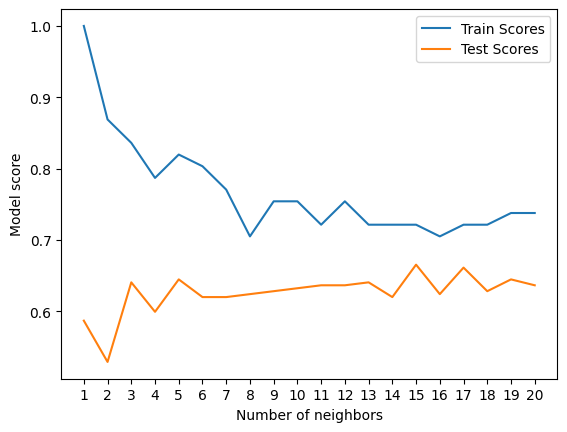

In [9]:
plt.plot(neighbores, Train_Scores, label = "Train Scores")
plt.plot(neighbores, Test_Scores, label = "Test Scores")

plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(Test_Scores)*100:.2f}%")